In [100]:
import json
import os
import subprocess as sp
import numpy as np
import matplotlib.pyplot as plt
import shutil

root_dir = "/home/lonya/doc/hami"
configs_dir = os.path.join(root_dir, "band_configs")
scjl_dir = "/home/lonya/doc/deeph/DeepH-pack/deeph/inference/sparse_calc.jl"
out_dir = os.path.join(root_dir, "out")


def gen_config(kpts, fermi_level = -9999, file_name="output"):
    kd = {} # k point dict
    for kpt in kpts[1:]:
        kd[kpt[0]] = kpt[2:]
    pts = kpts[0].strip().split()[1:] # target points
    k_data = []
    interpolations = kpts[0].split()[0]
    for i in range(len(pts)-1):
        k_data.append(interpolations + ' ' + kd[pts[i]] + ' ' + kd[pts[i+1]] + ' '  + pts[i] + ' ' + pts[i+1])
    data = {
        "calc_job": "band",
        "which_k": 0,
        "fermi_level": fermi_level,
        "max_iter": 300,
        "num_band": 50,
        "k_data": k_data
    }
    
    with open(os.path.join(configs_dir, file_name + '.json'), 'w') as json_file:
        json.dump(data, json_file, indent=4)
        
def gen_bands(in_dir, config_name, name="", emin=-9999, emax=9999, force_re=False):
    if name == "":
        name = config_name
    if force_re or os.path.exists(os.path.join(out_dir, name, 'openmx.Band')) == False:
        config_dir = os.path.join(configs_dir, config_name + '.json')
        with open(config_dir, 'r') as json_file:
            config = json.load(json_file)
        if config['fermi_level'] == -9999:
            with open(os.path.join(in_dir, 'info.json'), 'r') as json_file:
                config['fermi_level'] = json.load(json_file)['fermi_level']
            with open(config_dir, 'w') as json_file:
                json.dump(config, json_file, indent=4)
        sp.run(["julia", scjl_dir, "-i", in_dir, "-o", out_dir, "--config", config_dir])
    
    os.makedirs(os.path.join(out_dir, name), exist_ok=True)
    shutil.copyfile(os.path.join(out_dir, 'openmx.Band'), os.path.join(out_dir, name, 'openmx.Band'))
    
    k_data = []
    bands = []
    with open(os.path.join(out_dir, name, 'openmx.Band'), 'r') as f:
        lines = f.readlines()
        for l in range(3, len(lines)):
            if len(lines[l].split()) == 9:
                k_data.append(lines[l])
            if len(lines[l].split()) == 4:
                bands.append([float(e) for e in lines[l + 1].split() if emin < float(e) < emax])
                l += 1

    hkpoints = []
    for kline in k_data:
        hkpoints.append(kline.split()[7])
    hkpoints.append(k_data[-1].strip().split()[-1])
    interpolations = k_data[0].split()[0]
    kpoints = []
    for hkpoint in hkpoints[:-1]:
        kpoints.append(hkpoint)
        kpoints.extend(['' for _ in range(int(interpolations) - 1)])
    kpoints[-1] = hkpoints[-1]

    plt.figure(figsize=(8, 6))
    bands = list(map(list, zip(*bands)))
    for band in bands:
        plt.scatter(range(len(band)), band, color='blue', s=1)
    plt.xlabel('k')
    plt.ylabel('E - E_f (eV)')
    plt.title('Band Structure')
    plt.xticks(range(len(kpoints)), kpoints)
    plt.savefig(os.path.join(out_dir, name, name + '.png'))
    plt.show()

# CrI3

In [84]:
kpt = ["20 G A Y M G", "G 0 0 0", "A 0.5 0 0", "Y 0 0.5 0.5", "M 0.5 0.5 0.5"]

gen_config(kpt, file_name="CrI3")

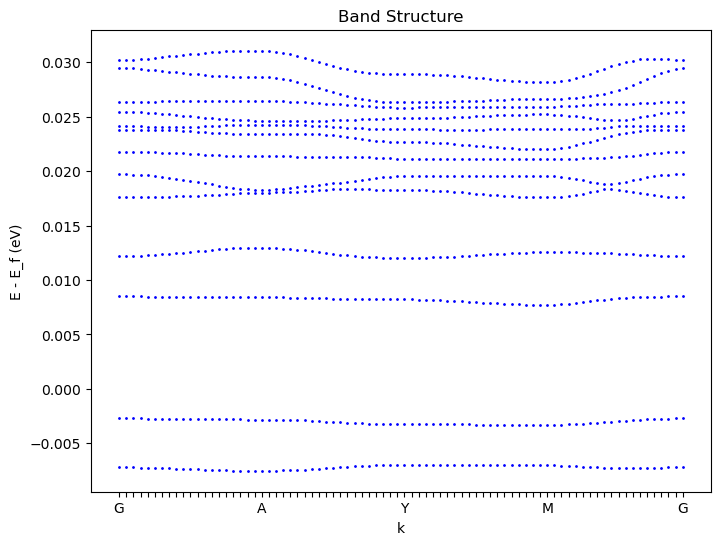

In [94]:
in_dir = "/home/lonya/doc/deeph/demo-CrI3/processed/1_1"
config_name  = "CrI3"

gen_bands(in_dir, config_name, emin=-0.01)


In [105]:
import h5py
in_dir2 = "/home/lonya/doc/deeph/demo-CrI3/results/eval/1_1"
with h5py.File(os.path.join(in_dir2, 'hamiltonians_pred.h5'), 'r') as file:
    def print_name(name):
        print(name)
    file.visit(print_name)

[-1, -1, 0, 1, 12]
[-1, -1, 0, 1, 28]
[-1, -1, 0, 13, 12]
[-1, -1, 0, 13, 16]
[-1, -1, 0, 13, 20]
[-1, -1, 0, 13, 28]
[-1, -1, 0, 13, 4]
[-1, -1, 0, 13, 8]
[-1, -1, 0, 17, 20]
[-1, -1, 0, 17, 28]
[-1, -1, 0, 21, 12]
[-1, -1, 0, 21, 20]
[-1, -1, 0, 21, 24]
[-1, -1, 0, 21, 28]
[-1, -1, 0, 21, 8]
[-1, -1, 0, 25, 28]
[-1, -1, 0, 29, 12]
[-1, -1, 0, 29, 16]
[-1, -1, 0, 29, 20]
[-1, -1, 0, 29, 24]
[-1, -1, 0, 29, 28]
[-1, -1, 0, 29, 32]
[-1, -1, 0, 29, 4]
[-1, -1, 0, 29, 8]
[-1, -1, 0, 5, 12]
[-1, -1, 0, 5, 20]
[-1, -1, 0, 5, 28]
[-1, -1, 0, 9, 12]
[-1, -1, 0, 9, 28]
[-1, 0, 0, 1, 11]
[-1, 0, 0, 1, 15]
[-1, 0, 0, 1, 19]
[-1, 0, 0, 1, 20]
[-1, 0, 0, 1, 23]
[-1, 0, 0, 1, 24]
[-1, 0, 0, 1, 27]
[-1, 0, 0, 1, 31]
[-1, 0, 0, 1, 7]
[-1, 0, 0, 10, 11]
[-1, 0, 0, 10, 12]
[-1, 0, 0, 10, 20]
[-1, 0, 0, 10, 24]
[-1, 0, 0, 10, 27]
[-1, 0, 0, 10, 28]
[-1, 0, 0, 10, 8]
[-1, 0, 0, 13, 11]
[-1, 0, 0, 13, 15]
[-1, 0, 0, 13, 19]
[-1, 0, 0, 13, 23]
[-1, 0, 0, 13, 27]
[-1, 0, 0, 13, 31]
[-1, 0, 0, 13, 7]
[-1, 0,

In [113]:
in_dir = "/home/lonya/doc/deeph/demo-CrI3/processed/1_1"
in_dir2 = "/home/lonya/doc/deeph/demo-CrI3/data/1_1"
in_dir3 = "/home/lonya/doc/deeph/demo-CrI3/results/eval/1_1"
config_name  = "CrI3"
if False:
    shutil.copyfile(os.path.join(in_dir, "overlaps.h5"), os.path.join(in_dir3, "overlaps.h5"))
    shutil.copyfile(os.path.join(in_dir2, "site_positions.dat"), os.path.join(in_dir3, "site_positions.dat"))
    shutil.copyfile(os.path.join(in_dir2, "orbital_types.dat"), os.path.join(in_dir3, "orbital_types.dat"))
    shutil.copyfile(os.path.join(in_dir2, "rlat.dat"), os.path.join(in_dir3, "rlat.dat"))


gen_bands(in_dir3, config_name, name="CrI3-demo", emin=-0.01, force_re=True)


/home/lonya/doc/hami/band_configs/CrI3.json


[ Info: read h5


Time for reading h5: 0.9395840167999268s


[ Info: construct sparse matrix in the format of COO


Time for constructing sparse matrix in the format of COO: 0.6011130809783936s


[ Info: convert sparse matrix to the format of CSC


Time for converting to the format of CSC: 0.2355809211730957s


[ Info: calculate bands

signal (2): 中断
in expression starting at /home/lonya/doc/deeph/DeepH-pack/deeph/inference/sparse_calc.jl:412
gomp_team_barrier_wait_end at /workspace/srcdir/gcc-11.1.0/libgomp/config/linux/x86/futex.h:97
gomp_team_end at /workspace/srcdir/gcc-11.1.0/libgomp/team.c:943
mkl_blas_zgeru_omp at /opt/intel/oneapi/mkl/2024.1/lib/libmkl_gnu_thread.so.2 (unknown line)
mkl_blas_zgeru at /opt/intel/oneapi/mkl/2024.1/lib/libmkl_gnu_thread.so.2 (unknown line)
mkl_blas_lp64_zgeru at /opt/intel/oneapi/mkl/2024.1/lib/libmkl_gnu_thread.so.2 (unknown line)
mkl_pds_lp64_zhetrs_bklfw_pardiso at /opt/intel/oneapi/mkl/2024.1/lib/libmkl_core.so.2 (unknown line)
mkl_pds_lp64_fct_cmplx_block at /opt/intel/oneapi/mkl/2024.1/lib/libmkl_core.so.2 (unknown line)
mkl_pds_lp64_blkl_ll_cmplx._omp_fn.0 at /opt/intel/oneapi/mkl/2024.1/lib/libmkl_gnu_thread.so.2 (unknown line)
GOMP_parallel at /workspace/srcdir/gcc-11.1.0/libgomp/parallel.c:178
mkl_pds_lp64_blkl_ll_cmplx at /opt/intel/oneapi/mkl

KeyboardInterrupt: 